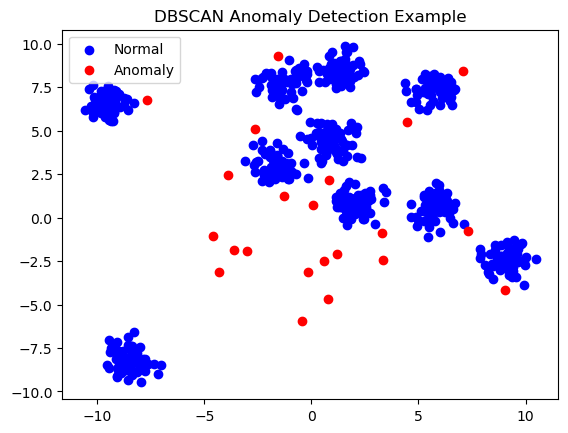

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=600, centers=10, cluster_std=0.60, random_state=0)
# Add some anomalies
anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, anomalies])

# Fit DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)
labels = dbscan.fit_predict(X)

# Anomalies are labeled as -1
anomaly_mask = labels == -1

# Plot
plt.scatter(X[~anomaly_mask, 0], X[~anomaly_mask, 1], c='b', label='Normal')
plt.scatter(X[anomaly_mask, 0], X[anomaly_mask, 1], c='r', label='Anomaly')
plt.legend()
plt.title("DBSCAN Anomaly Detection Example")
plt.show()

In [7]:
#load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


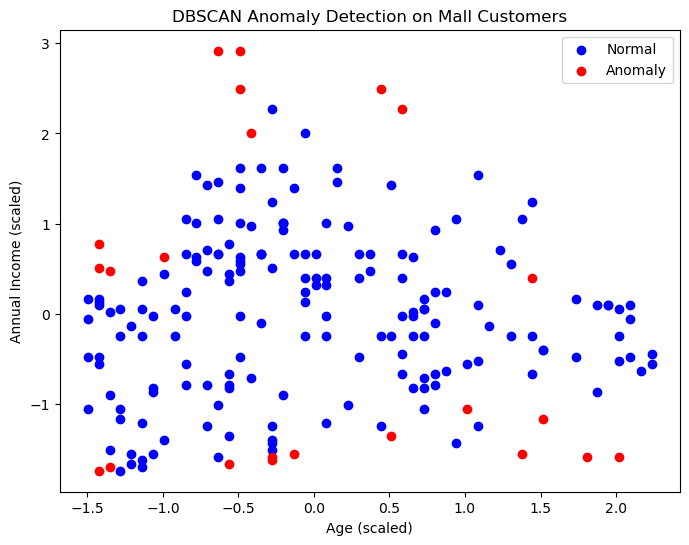

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Select numerical features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_df = df[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Fit DBSCAN
dbscan_df = DBSCAN(eps=0.8, min_samples=10)
labels_df = dbscan_df.fit_predict(X_scaled)

# Mark anomalies (label == -1)
anomaly_mask_df = labels_df == -1

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[~anomaly_mask_df, 0], X_scaled[~anomaly_mask_df, 1], c='b', label='Normal')
plt.scatter(X_scaled[anomaly_mask_df, 0], X_scaled[anomaly_mask_df, 1], c='r', label='Anomaly')
plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.legend()
plt.title("DBSCAN Anomaly Detection on Mall Customers")
plt.show()